# Importing Libraries
As usual with our work, we shall start by importing the libraries we need to work with our data.
To ensure you have all the libraries we shall use installed, make sure to run the following command in your command line 
```pip install tensorflow matplotlib seaborn numpy pandas pydot graphviz ``` 

In [3]:
import keras.src.initializers.initializers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd
import math
import datetime
import platform
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Loading Data
Let's go ahead and load our data. Since in this case our data is split into two separate files, we won't need to manually split it using a train_test_split. 
Just to make it clear with the data we are loading in being called 'wdr-test.csv and wdr-train.csv'. The 'wdr' here stands for Written Digit Recognition

In [4]:
#Load our dataset
train_df = pd.read_csv('wdr-train.csv')
test_df = pd.read_csv('wdr-test.csv')

Now, once again after we have loaded our dataset we shall take a minute to try and understand it. 

In [5]:
print(train_df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

Alright, so here it appears the data has 42,000 items and 785 columns. That's cool and it appears that every single digit we are trying to classify is represented by 785 columns. 
Next let's do a simple shape print to confirm this.

In [6]:
print('train shape: ', train_df.shape)
print('test shape: ', test_df.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


The shape here shows us that while the training data has 785 pixel per character, it would appear the testing data frame has 784 instead. 
Next, let's work on splitting our data into the inputs and outputs. Again, the X and Y.

In [7]:
X = train_df.iloc[:, 1:785] #Here we are selecting all columns (:) and columns from 1-785
Y = train_df.iloc[:, 0] #Then we select the first column which is the identity of the numbers
# Let's pick out our test data as well
X_test = test_df.iloc[:,1:784] 

Next we're going to perform our main objective today, we're going to visualize large data. Now in our case, it's not that the data is exceptionally large, rather it's that the data has very many features. 

Because our data is made up of 785 columns, it's extremely high dimensional data. This means that by simply printing the data, we can't really find a way to understand it. This is where dimensionality reduction comes in handy. 

We are going to use t_SNE to help us bring doing down our dataset into 2 axes. Then we shall use a scatter plot to visualize this data. 

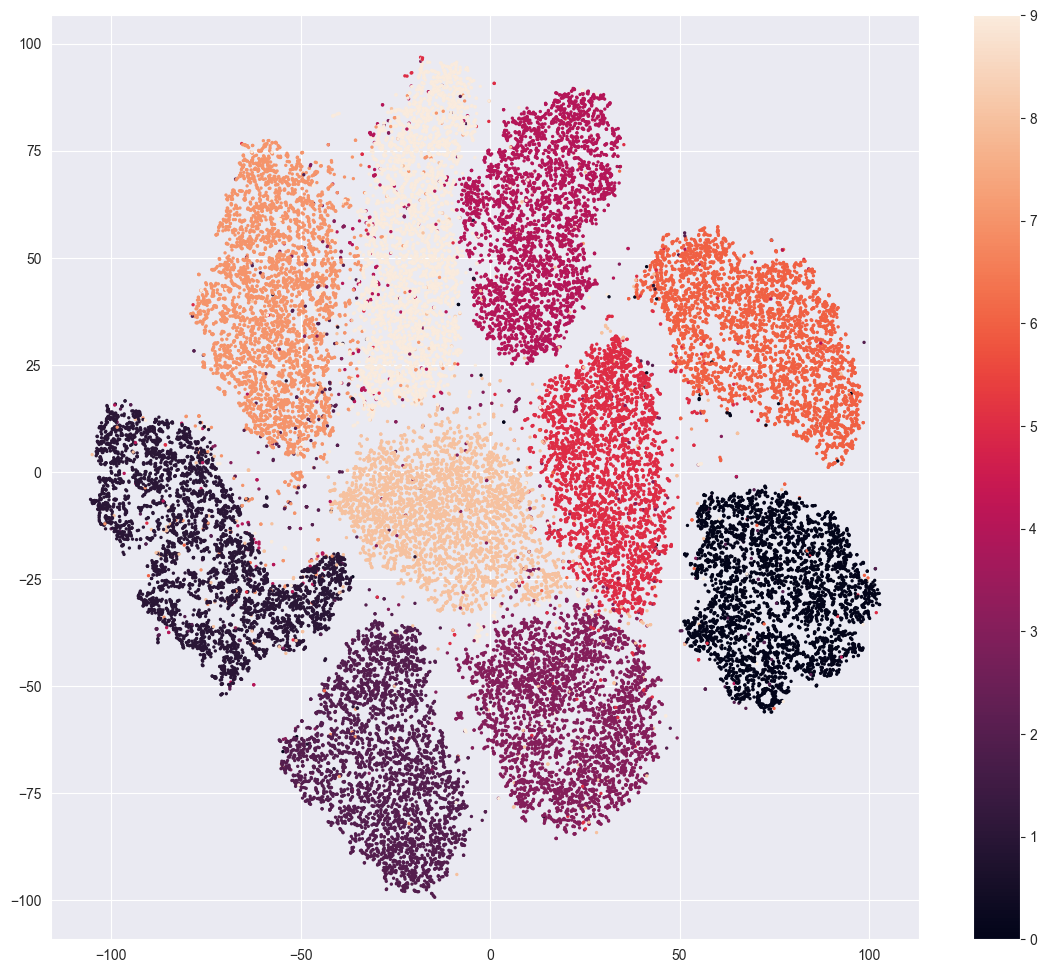

In [9]:
X_tsn = X/255
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)
plt.figure(figsize=(14,12))
plt.scatter(tsne_res[:,0], tsne_res[:,1],c=Y,s=2)
plt.colorbar()

Think of the space of the graph as spaces that represent locations of pixel. The graph shows then, that specific numbers use specific pixel more than other numbers do, aside from a few outliers. This forms the basis for our AI analysis to begin. 

Let's now move on to creating a validation and training set for our data. 

In [6]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1212)
print("X_train shape: ",X_train.shape)
print("X_validation shape: ",X_validation.shape)
print("Y_train shape: ",Y_train.shape)
print("Y_validation shape: ",Y_validation.shape)

X_train shape:  (33600, 784)
X_validation shape:  (8400, 784)
Y_train shape:  (33600,)
Y_validation shape:  (8400,)


Now we want to convert our data into arrays. Because our data is an array of images, we need to convert each image from a 1D list of images to a 2D grid of the same image data but now arranged in a similar way pixels would. 

As you can see from our logs above, the test data frame contains 33600 items while the training set contains 8400 and each have 784 items. The number 784 is actually a square number, so we can tell that the images are square images, having an area of 784 meaning a height and width of 28x28. To change our data into an array we shall use numpy reshape which takes in 3 params which our case will correspond to (image_count, width, length). Then we proceed to do the same for the other items in our array. 

In [26]:
x_train_arr = X_train.to_numpy().reshape(33600,28,28)
y_train_arr = Y_train.values
x_validation_arr = X_validation.to_numpy().reshape(8400,28,28)
y_validation_arr = Y_validation.values
x_test_arr = test_df.to_numpy().reshape(28000, 28,28)

Now let's save our data shape to some variables. 

In [8]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_arr.shape
IMAGE_CHANNELS = 1

Now, what's the point of organizing our data into image space if we can't visualize it? Well, we can. 

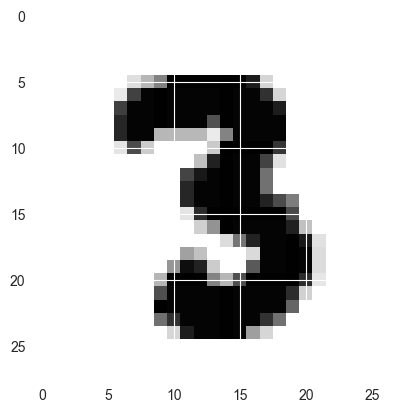

In [9]:
plt.imshow(x_train_arr[2], cmap=plt.cm.binary)
plt.show()

Alright, now that we have our images set out into grids that can be visualized, we need make one last change. Images normally come in as a grid of pixels and that's why we have organized them into a 2D grid. However, each pixel normally has 3 channels (RGB) and thus we need yet another dimension to our data, 3 additional channels to which we can add values for the amount of RGB in each image. Luckily, this is easy to achieve. 

In [0]:
x_train_with_channels = x_train_arr.reshape(
    x_train_arr.shape[0],  # Number of images (assuming the first dimension is the number of images)
    IMAGE_WIDTH,            # Width of each image
    IMAGE_HEIGHT,           # Height of each image
    IMAGE_CHANNELS          # Number of channels (e.g., 1 for grayscale, 3 for RGB)
)

x_validation_with_channels = x_validation_arr.reshape(
    x_validation_arr.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_channels = x_test_arr.reshape(
    x_test_arr.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

print('x_train_with_channels:', x_train_with_channels.shape)
print('x_validation_with_channels:', x_validation_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)

Then we need to normalize our data.

In [15]:
x_train_normalized = x_train_with_channels / 255
x_validation_normalized = x_validation_with_channels / 255
x_test_normalized = x_test_with_channels / 255

# Building our Model
We're finally here. Now that we have understood how our AI can classify data, we can choose a suitable model and start to train it. Because our problem is one of image recognition, there is no doubt that our best candidate here is a Convolutional Neural Network. 

Since we're working with a  convolutional model this time, the setup process for our model is going to be a bit more complex as it will have multiple layers that I will outline. 

We shall have two convolutional layers to try and extract the features from the data set. Then we shall apply a dropout to reduce the dependence of the model on the data, and finally we pass the data through a Dense layer to classify the data. The output is a 10-dimensional vector where every item represents a number from 0-10. Let's take a look at what this looks like.

In [11]:
model = tf.keras.models.Sequential()

# Add a convolutional layer to the neural network model
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),  # Input shape for images
    kernel_size=5,  # Size of the convolutional kernel (5x5)
    filters=8,  # Number of filters (output channels)
    strides=1,  # Stride of the convolution operation (1 pixel at a time)
    activation=tf.keras.activations.relu,  # Rectified Linear Unit (ReLU) activation
    kernel_initializer=tf.keras.initializers.VarianceScaling()  # Weight initialization
))

# Add a MaxPooling layer to the neural network model
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),   # Size of the pooling window (2x2)
    strides=(2, 2)      # Strides for the pooling operation (2 pixels at a time)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Add a Flatten layer to the neural network model
model.add(tf.keras.layers.Flatten())

# Add a Dense (fully connected) layer to the neural network model
model.add(tf.keras.layers.Dense(
    units=128,                      # Number of neurons (units) in the layer
    activation=tf.keras.activations.relu  # Activation function (Rectified Linear Unit - ReLU)
))

# Add a Dropout layer to the neural network model
model.add(tf.keras.layers.Dropout(0.2))

# Add a Dense (fully connected) output layer to the neural network model
model.add(tf.keras.layers.Dense(
    units=10,                             # Number of output units (e.g., for classification)
    activation=tf.keras.activations.softmax,  # Activation function (softmax for multi-class classification)
    kernel_initializer=tf.keras.initializers.VarianceScaling()  # Weight initialization
))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

Alright, now we can see our model is made up of basically 2 main layers. An initial group that contains the convolutional 2D nodes and then a group after that which contains the Dense layers and a dropout layer. 

Let's go ahead and print a simple flow chart to further visualize information flow in our model.

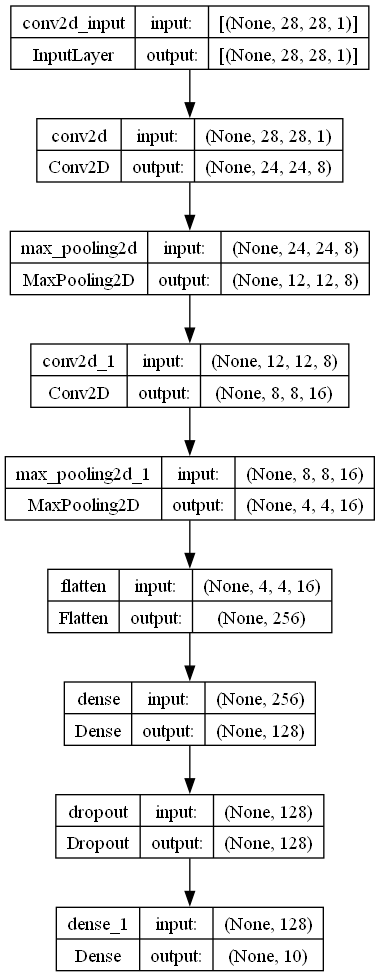

In [13]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Alright, that's just a summary of our model. Let's go ahead and prepare our model for training by compiling.

In [14]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Finally, now we can train our model.

In [17]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(
    x_train_normalized,
    y_train_arr,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_arr),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2667 - accuracy: 0.9176 - val_loss: 0.0908 - val_accuracy: 0.9733
Epoch 2/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0879 - accuracy: 0.9727 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 3/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.0575 - val_accuracy: 0.9849
Epoch 4/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 6/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0449 - val_accuracy: 0.9873
Epoch 7/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 0.0493 - val_accuracy:

# Evaluating Our Model
Alright, so we're finally here. We have our trained model, let's run some evaluations to see how the model performs. Unlike our previous model though where we didn't really have any data save during our model training, tensorflow give us a history variable that allows us to see information about how our training went. Let's start by plotting this. 

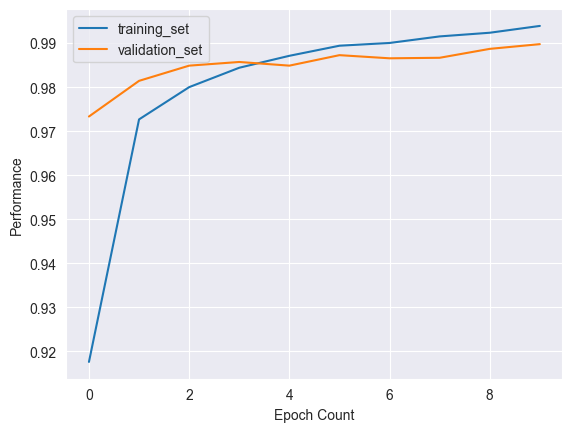

In [20]:
plt.xlabel("Epoch Count")
plt.ylabel("Performance")
plt.plot(training_history.history['accuracy'], label='training_set')
plt.plot(training_history.history['val_accuracy'], label='validation_set')
plt.legend()

As we can see, for our training set, the model initially has no idea what's going on but then later starts to get very good at classifying the digits. 

Now, as you might recall, we also have a testing set to test the model on, let's give that a try and see how it performs.

In [29]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_arr)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

263/263 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9898
Validation loss:  0.04523501545190811
Validation accuracy:  0.9897618889808655


Interesting, our model has learned to classify the handwritten digits to near 100% accuracy. 

Alright, that's the final part of our Handling Large Data in Jupyter tutorial, we've handled and performed extensive amounts of modifications on the Data frame we had today, and it gave an opportunity to learn a lot of the data manipulation that's sometimes needed to deal with this kind of data.

Our next part is going to be quite interesting as well shall deal with Spam Email Detection with the primary focus of learning how to perform feature extraction on our data. Hope to see you soon!